In [6]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn, filters2diagrams, testmodels, diagrams_2_images, diagrams_2_tpers, concatenate_top_features

In [2]:
%load_ext autoreload
%autoreload 2

In [31]:
#Load data
from tensorflow import keras
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
X = train_images[:5000]
y = train_labels[:5000]
#digits = load_digits()
#X = np.reshape(digits.data, (len(digits.data),8,8))
#y = digits.target


kNN Results:  [0.42591482 0.4355129  0.44117647]
Gradient Boosting Results:  [0.51589682 0.53209358 0.55102041]


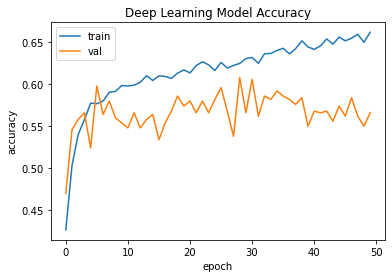

In [32]:
# Baseline : Not Using any filters
D = filters2diagrams(X,[])
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)
#topfiltlearn(X,y,[],pool=True)

kNN Results:  [0.35572885 0.38632274 0.37695078]
Gradient Boosting Results:  [0.36592681 0.43131374 0.42016807]


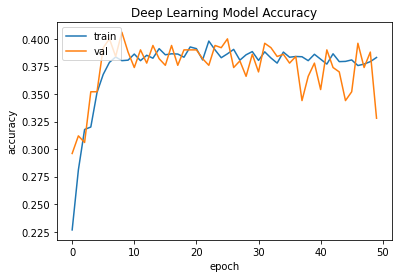

In [33]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.3845231  0.40731854 0.40636255]
Gradient Boosting Results:  [0.42111578 0.44571086 0.45858343]


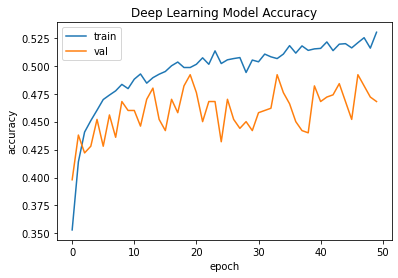

In [35]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)


kNN Results:  [0.24535093 0.26154769 0.25570228]
Gradient Boosting Results:  [0.28734253 0.30713857 0.33553421]


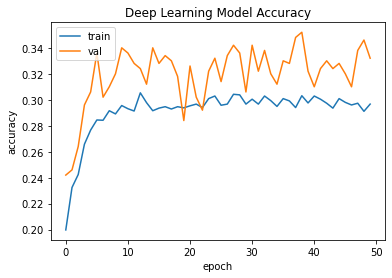

In [36]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.54589082 0.56208758 0.55702281]
Gradient Boosting Results:  [0.53209358 0.56988602 0.58103241]


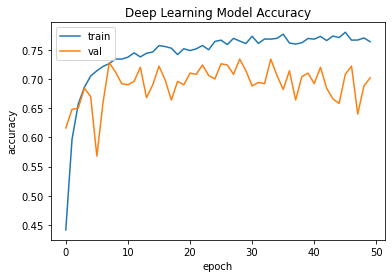

In [37]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(len(patches),16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
M = np.asarray(pca.components_[:10]).T
filters = []
for i in range(16):
    weights = np.random.uniform(size=10)
    weights = weights/sum(weights)
    filters.append(np.reshape(np.matmul(M,weights),(4,4)))

D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)

kNN Results:  [0.4685063  0.5134973  0.48739496]
Gradient Boosting Results:  [0.51829634 0.55488902 0.56002401]


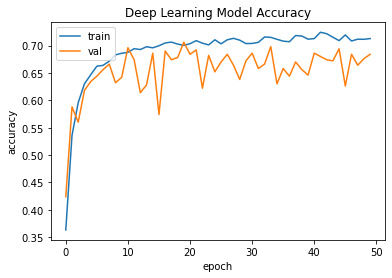

In [38]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.45890822 0.47990402 0.469988  ]
Gradient Boosting Results:  [0.56628674 0.57708458 0.57503001]


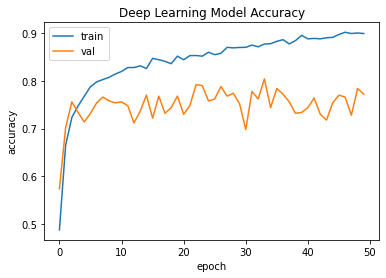

In [39]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(16):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)

kNN Results:  [0.62807439 0.68446311 0.63745498]
Gradient Boosting Results:  [0.5644871  0.5734853  0.58463385]


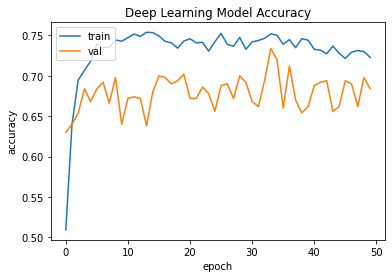

In [40]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters
con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)

kNN Results:  [0.62267546 0.66166767 0.64165666]
Gradient Boosting Results:  [0.69526095 0.72465507 0.71548619]


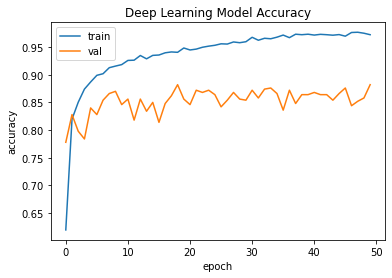

In [41]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(50):
    filters.append(np.reshape(sample_spherical(1,9),(3,3)))

D = filters2diagrams(X,filters,pool=True)
#Compute persistent images of diagrams
images = diagrams_2_images(D)
#Concatenate images across filters
con_images = concatenate_top_features(images)
#Test these features on the learning task
testmodels(con_images,y)

kNN Results:  [0.70605879 0.73905219 0.73589436]
Gradient Boosting Results:  [0.67306539 0.69466107 0.69087635]


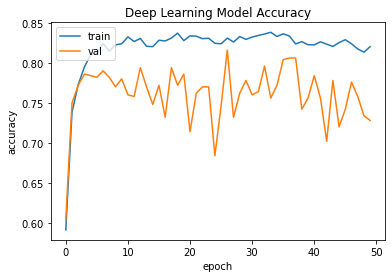

In [42]:
#We can also compute total persistence
tpers = diagrams_2_tpers(D)
#Concatenate this  across filters

con_tpers = concatenate_top_features(tpers)
#Test these features on the learning task
testmodels(con_tpers,y)